# Python DL Chapter5

## 誤差逆伝播法

四章で、試しに学習をやらせてみたが、重みパラメータの勾配(重みパラメータに関する損失関数の勾配)を数値微分で求めていると、実装は簡単だったが、計算時間が膨大なため、全くと言っていいほど学習が進まなかった。(一晩やらせて、4epochしか進まなかった。結構いいPCなのに。。。)

そこで、この計算を効率よく行う方法に**誤差逆伝播法**がある。

ちなみにこの書籍ではグラフを使って説明されていて、その参考元はAndrej KarpathyさんとあのFei-Fei Liさんらしい。(スタンフォード大学教授)
前者のAndrejさんはあまり知らないが、Fei-Fei Li さんは確か、TRU (TOYOTA Research Institute)に引きぬかれた、Deep Learning界隈での超大物なので、勝手に学習意欲が高まった。

### 計算グラフ
Node と Edgeで構成されるグラフ構造で説明されており、すごくわかりやすい。

問1
100円のりんごを2個買った時、消費税込みの価格は？


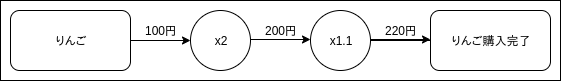

問2
100円のりんごを2個、150円のみかんを3個買った時の消費税込みの値段は？

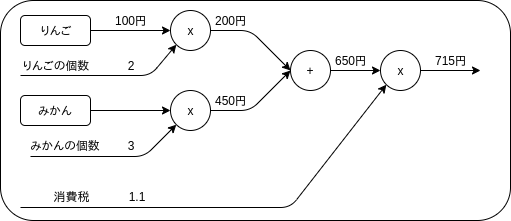

上図のように、計算グラフを使って計算を行う場合は、以下の2ステップが必要になる。

1. 計算グラフを構築する
2. 計算グラフ上で計算を左から右へ進める

ここで、2.のステップで行う、左から右へ進めることを順方向の伝播、**順伝播**と呼ばれる.
逆に右から左へ進めることを**逆伝播** と呼ぶ。

### 局所的な計算

計算グラフの特徴は、"局所的な計算"を伝播することで最終的な結果を得ることができる点にある。

これはつまり、全体でどのようなことが行われているかは関係なく、自分に関係のある情報、計算結果だけからその次への結果を出力することができるということ。


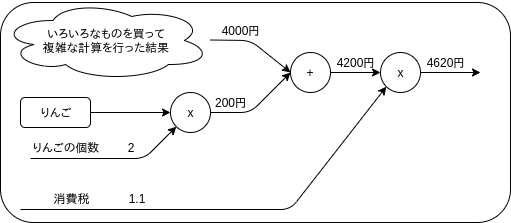

この後の注記で書いてあった、車の組み立ての例がすごく分かりやすかった。

車全体を見るとすごく複雑だが、実際には流れ作業で部品ごとに(局所的に)分けて、作業を単純化している。

このように、複雑な計算も分割すれば、単純な計算から構築されている。

### 計算グラフの利点

計算グラフを使う理由は以下の通り。

* 全体でどのように複雑な計算をしても局所的な計算によって問題を単純化できること
* 計算グラフによって、途中の計算結果を保持できること

ただ、最大の理由は

* 逆方向の伝播を利用することで**微分**を効率よく計算できる

ことにある。

ここで問1のグラフについて、もしりんごの値段が変わった時、支払金額への影響を考えるとすると、

最終的な支払い金額への影響　= **りんごの値段に関する支払金額の微分**

と言い換えることができる。

これはりんごの値段をx, 支払い金額をLとした時、

$$ \frac{\partial L}{\partial x} $$

で表現できる。(りんごの値段での偏微分)

これは、りんごの値段が**"少しだけ"**変化した時に支払金額がどれだけ変化するかを示している。



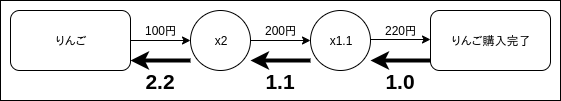

上の図では問1の図に逆伝播の場合を太い矢印で描いている。

逆伝播では、各Nodeの間をつなぐEdgeで表現されている**局所的な計算の結果の微分**を伝達する。

このことから、りんごが1円値上がりすると最終的な購入金額は2.2円増加することになる。

これはりんごの単価だけではなく、個数や消費税の場合でも同じように計算することができる。

このように、計算グラフの利点とは、順伝播と逆伝搬をつかうことで、各変数の微分の値を効率よく求めることができる点にある。

## 連鎖律(chain rule)

計算グラフにおいて、順伝播は、一般的な計算と同じ流れで、左から右へと順方向に伝達した。
対して、逆伝搬では、"局所的な微分"を順方向とは逆方向の右から左へと伝達する。

この局所的な微分を伝達する原理は**連鎖律**と呼ばれる。


連鎖律の説明をお硬い口調で説明すると、

　ある関数が合成関数で表現される場合、その合成関数の微分は合成関数を構成するそれぞれの関数の微分の席によって表すことができる

となる。(これを連鎖律の原理という)


つまり、下の式でこの原理を表現すると、

$$ z = (x+y)^2 $$
という関数があったとするとこれは以下の２つの式によって表現できる

$$ z = t^2 $$
$$ t = x + y $$

ここでひとつ目の式のxについての微分は以下の表現できる。

(zに関するxの微分) = (zに関するtの微分) * (tに関するxの微分)

$$ \frac{\partial z}{\partial x} = \frac{\partial z}{\partial t} \frac{\partial t}{\partial x} $$

ちなみにこれを計算すると

$$ 
\frac{\partial z}{\partial t} = 2t
$$
$$
\frac{\partial t}{\partial x} = 1
$$
となり、

$$
\frac{\partial z}{\partial x} = 2t * 1 = 2(x+y) 
$$
となる

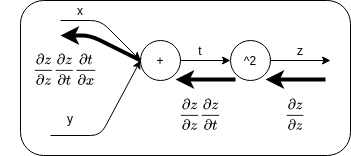

### 逆伝播
#### 加算ノードの逆伝播
例えばz = x + yという数式があるとすると、それぞれの微分は

$$ \frac{\partial L}{\partial x} = 1 $$
$$ \frac{\partial L}{\partial y} = 1 $$

となる。そのため計算グラフは以下のようになる。


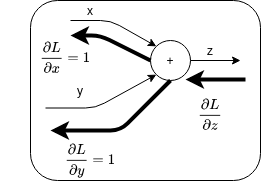

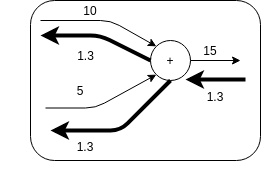

####　乗算ノードの逆伝播
$$ z = x * y $$
という式があったとすると、それぞれの微分は、

$$ \frac{\partial L}{\partial x} = y $$

$$ \frac{\partial L}{\partial y} = x $$

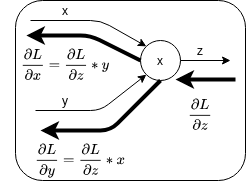

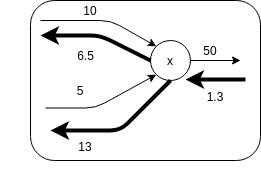

最初のりんごとみかんを購入した際の計算グラフに逆伝播を追加すると下のようになる。

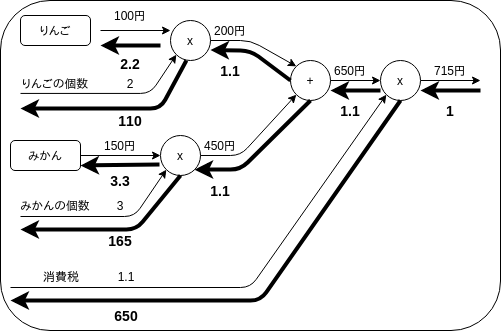


## 単純なレイヤの実装
### 乗算レイヤの実装


In [12]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
    
    def Forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        return(out)

    def Backword(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return(dx, dy)

In [17]:
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

#Forward
apple_price = mul_apple_layer.Forward( apple, apple_num)
price = mul_tax_layer.Forward( apple_price, tax)

#Backward
dprice = 1
(dapple_price, dtax_price) = mul_tax_layer.Backword(dprice)
(dapple, dapple_num) = mul_apple_layer.Backword(dapple_price)


print("Forward: Apple Price without tax = ", apple_price, ", with tax = ", price)
print("Backward: d_apple = ", dapple, ", dapple_num = ", dapple_num,"d_apple_price = ", dapple_price, ", dtax_price = ", dtax_price)

Forward: Apple Price without tax =  200 , with tax =  220.00000000000003
Backward: d_apple =  2.2 , dapple_num =  110.00000000000001 d_apple_price =  1.1 , dtax_price =  200


### 加算レイヤの実装

In [19]:
class AddLayer:
    def __init__(self):
        self.x = None
        self.y = None
    
    def Forward( self, x, y):
        self.x = x
        self.y = y

        out = x + y
        return(out)
    
    def Backward( self, dout):
        dx = dout * 1
        dy = dout * 1

        return(dx, dy)


In [20]:
apple = 100
apple_num = 2

orange = 150
orange_num = 3

tax = 1.1

mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()

add_totalsum_layer = AddLayer()

mul_tax_layer = MulLayer()


#Forward
apple_price = mul_apple_layer.Forward( apple, apple_num)
orange_price = mul_orange_layer.Forward( orange, orange_num)
totalsum_price = add_totalsum_layer.Forward( apple_price, orange_price)
price = mul_tax_layer.Forward( totalsum_price, tax)

#Backward
dprice = 1
(dtotalsum_price, dtax_price) = mul_tax_layer.Backword(dprice)
(dapple_price, dorange_price) = add_totalsum_layer.Backward(dtotalsum_price)
(dapple, dapple_num) = mul_apple_layer.Backword(dapple_price)
(dorange, dorange_num) = mul_orange_layer.Backword(dorange_price)

print("Forward: Apple Price without tax = ", apple_price, ", with tax = ", price)
print("Backward: d_apple = ", dapple, ", dapple_num = ", dapple_num,"d_apple_price = ", dapple_price, ", dtax_price = ", dtax_price)
print("Backward: d_orange = ", dorange, ", dorange_num = ", dorange_num,"d_orange_price = ", dorange_price)

Forward: Apple Price without tax =  200 , with tax =  715.0000000000001
Backward: d_apple =  2.2 , dapple_num =  110.00000000000001 d_apple_price =  1.1 , dtax_price =  650
Backward: d_orange =  3.3000000000000003 , dorange_num =  165.0 d_orange_price =  1.1


### 活性化関数レイヤの実装
#### ReLUレイヤ
